## A. Process presaved Florida images with EarthPy ##

EarthPy package: https://www.earthdatascience.org/tools/

In [1]:
import numpy as np

import rasterio as rio

import earthpy.plot as ep
import earthpy.spatial as es

In [2]:
import os
import glob

os.getcwd()

'C:\\Users\\cyril\\Documents'

In [3]:
sPath = ("esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/"
    "L1C_T19TEK_A032283_20210827T153945/IMG_DATA")

In [4]:
bandFiles = sorted(glob.glob(sPath + "/*.jp2"))
bandFiles

['esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B01.jp2',
 'esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B02.jp2',
 'esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B03.jp2',
 'esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B04.jp2',
 'esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B05.jp2',
 'esg notebooks/S2A_MSIL1C_20210827T153601_N0301_R111_T19TEK_20210827T191624.SAFE/GRANULE/L1C_T19TEK_A032283_20210827T153945/IMG_DATA\\T19TEK_20210827T153601_B0

In [5]:
lst = []
for ii in bandFiles:
    with rio.open(ii, "r") as f:
        lst.append(f.read(1))

In [6]:
[ii.shape for ii in lst]

[(1830, 1830),
 (10980, 10980),
 (10980, 10980),
 (10980, 10980),
 (5490, 5490),
 (5490, 5490),
 (5490, 5490),
 (10980, 10980),
 (1830, 1830),
 (1830, 1830),
 (5490, 5490),
 (5490, 5490),
 (5490, 5490),
 (10980, 10980)]

In [7]:
for ii in [0, 8, 9]:
    lst[ii] = np.kron(lst[ii], np.ones((6, 6)))
for ii in [4, 5, 6, 10, 11, 12]:
    lst[ii] = np.kron(lst[ii], np.ones((2, 2)))

In [8]:
arrSt = np.stack(lst)
arrSt.shape

(14, 10980, 10980)

Lighten up the image:

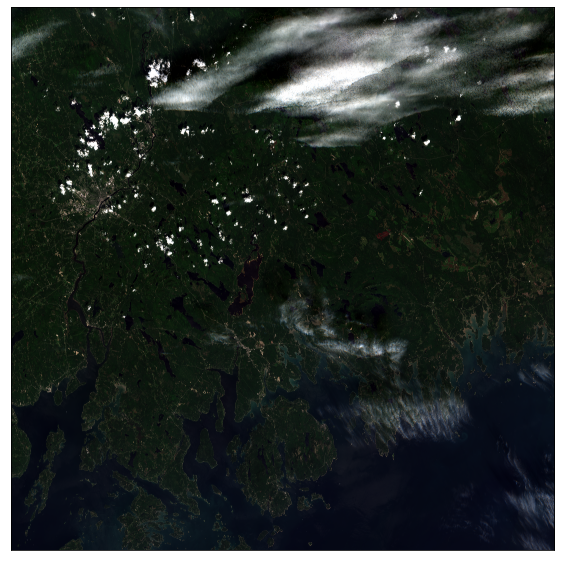

<AxesSubplot:>

In [9]:
ep.plot_rgb(arrSt, rgb=(3, 2, 1), stretch=True, str_clip=0.5)

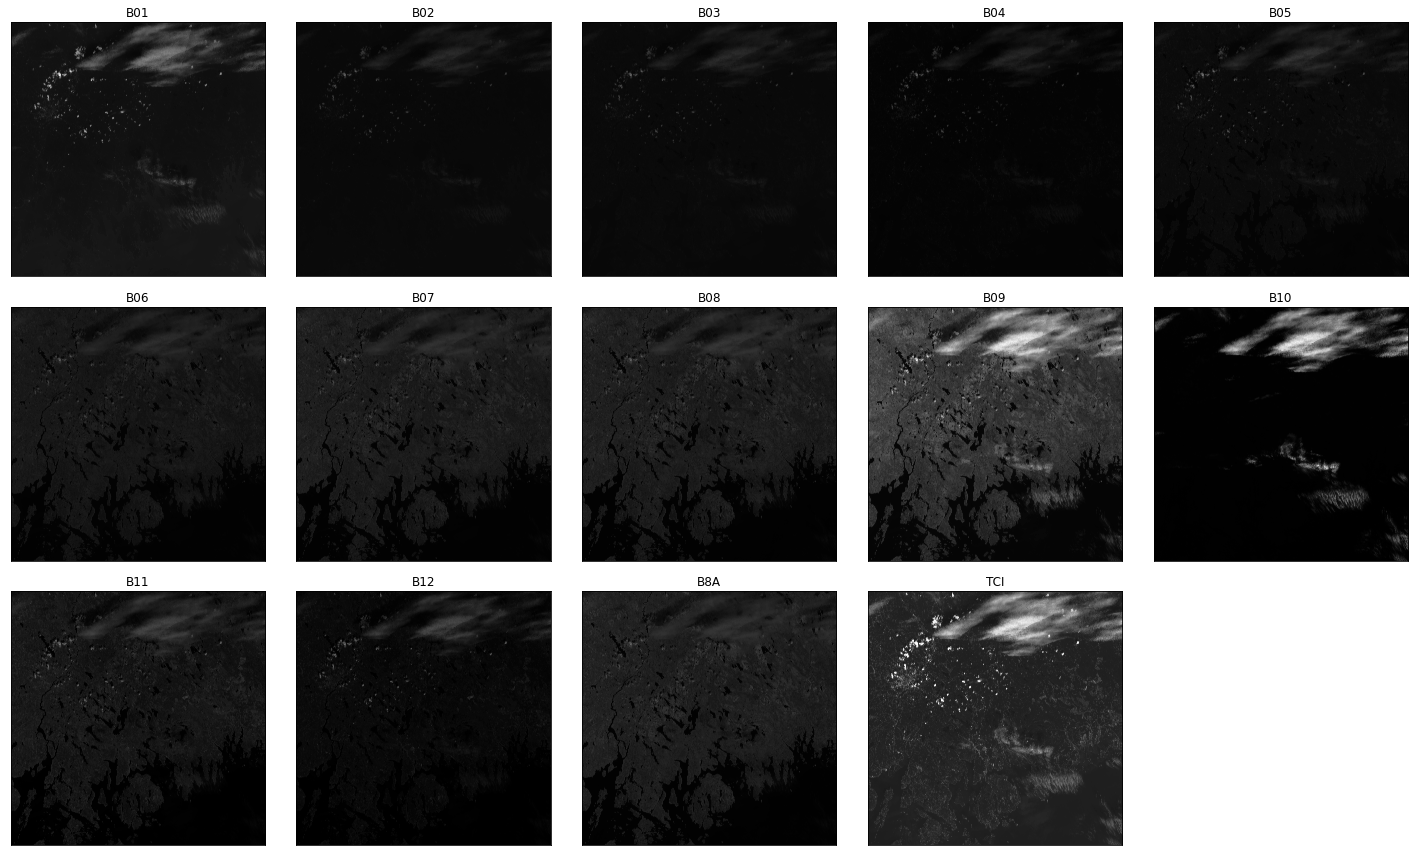

array([[<AxesSubplot:title={'center':'B01'}>,
        <AxesSubplot:title={'center':'B02'}>,
        <AxesSubplot:title={'center':'B03'}>,
        <AxesSubplot:title={'center':'B04'}>,
        <AxesSubplot:title={'center':'B05'}>],
       [<AxesSubplot:title={'center':'B06'}>,
        <AxesSubplot:title={'center':'B07'}>,
        <AxesSubplot:title={'center':'B08'}>,
        <AxesSubplot:title={'center':'B09'}>,
        <AxesSubplot:title={'center':'B10'}>],
       [<AxesSubplot:title={'center':'B11'}>,
        <AxesSubplot:title={'center':'B12'}>,
        <AxesSubplot:title={'center':'B8A'}>,
        <AxesSubplot:title={'center':'TCI'}>, <AxesSubplot:>]],
      dtype=object)

In [10]:
ep.plot_bands(arrSt, figsize=(20, 12), cols=5, cbar=False, title=[ii[-7:-4] for ii in bandFiles])

Spectral distribution within each band:

(<Figure size 1440x864 with 15 Axes>,
 array([[<AxesSubplot:title={'center':'B01'}>,
         <AxesSubplot:title={'center':'B02'}>,
         <AxesSubplot:title={'center':'B03'}>,
         <AxesSubplot:title={'center':'B04'}>,
         <AxesSubplot:title={'center':'B05'}>],
        [<AxesSubplot:title={'center':'B06'}>,
         <AxesSubplot:title={'center':'B07'}>,
         <AxesSubplot:title={'center':'B08'}>,
         <AxesSubplot:title={'center':'B09'}>,
         <AxesSubplot:title={'center':'B10'}>],
        [<AxesSubplot:title={'center':'B11'}>,
         <AxesSubplot:title={'center':'B12'}>,
         <AxesSubplot:title={'center':'B8A'}>,
         <AxesSubplot:title={'center':'TCI'}>, <AxesSubplot:>]],
       dtype=object))

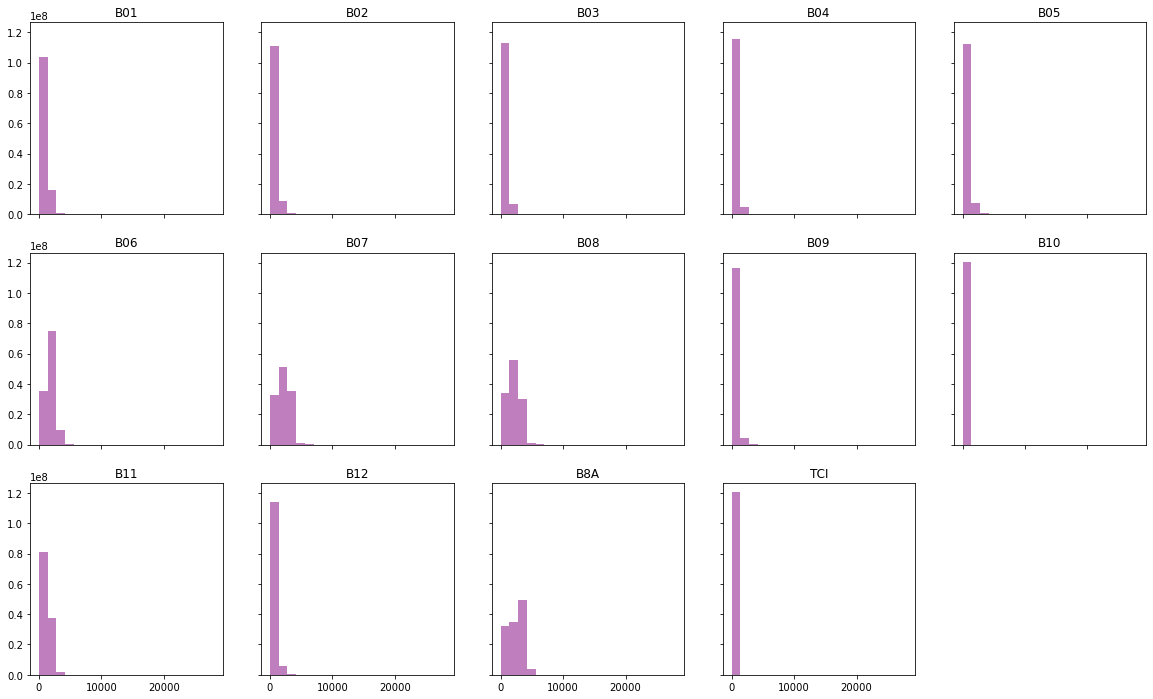

In [11]:
ep.hist(arrSt,
    title=[ii[-7:-4] for ii in bandFiles], 
    cols=5, alpha=0.5, figsize = (20, 12))

Aggregation indexes:

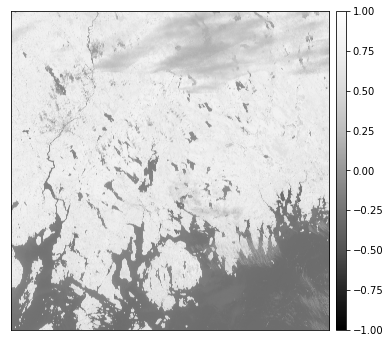

<AxesSubplot:>

In [12]:
ndvi = es.normalized_diff(arrSt[7], arrSt[3])
ep.plot_bands(ndvi, vmin=-1, vmax=1, figsize=(6, 6))

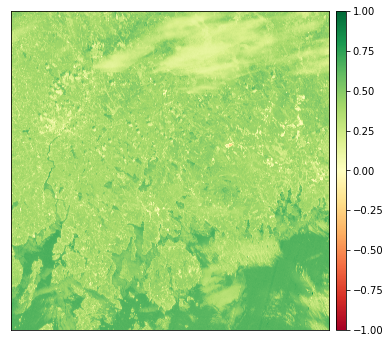

<AxesSubplot:>

In [13]:
ndmi = es.normalized_diff(arrSt[12], arrSt[10])
ep.plot_bands(ndmi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(6, 6))

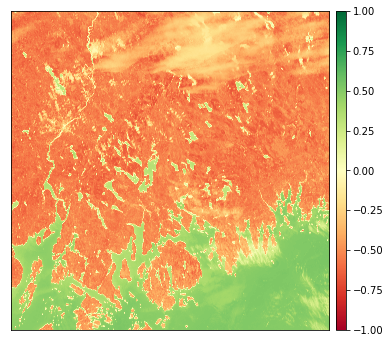

<AxesSubplot:>

In [14]:
ndwi = es.normalized_diff(arrSt[2], arrSt[7])
ep.plot_bands(ndwi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(6, 6))

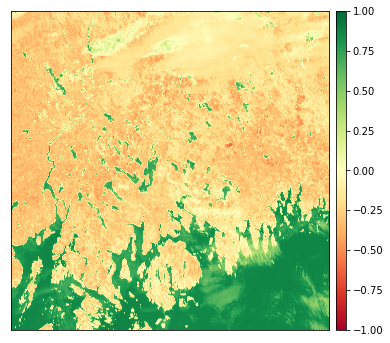

<AxesSubplot:>

In [15]:
ndsi = es.normalized_diff(arrSt[2], arrSt[10])
ep.plot_bands(ndsi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(6, 6))

<ipython-input-16-8a178e92fcf3>:1: RuntimeWarning: divide by zero encountered in true_divide
  vari = (arrSt[2] - arrSt[3])/ (arrSt[2] + arrSt[3] - arrSt[1])


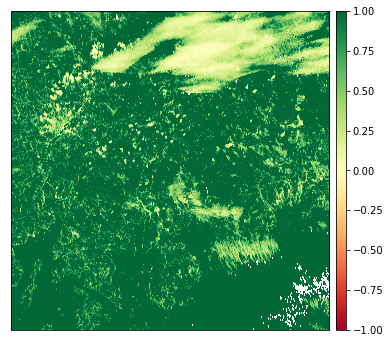

<AxesSubplot:>

In [16]:
vari = (arrSt[2] - arrSt[3])/ (arrSt[2] + arrSt[3] - arrSt[1])
ep.plot_bands(vari, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(6, 6))

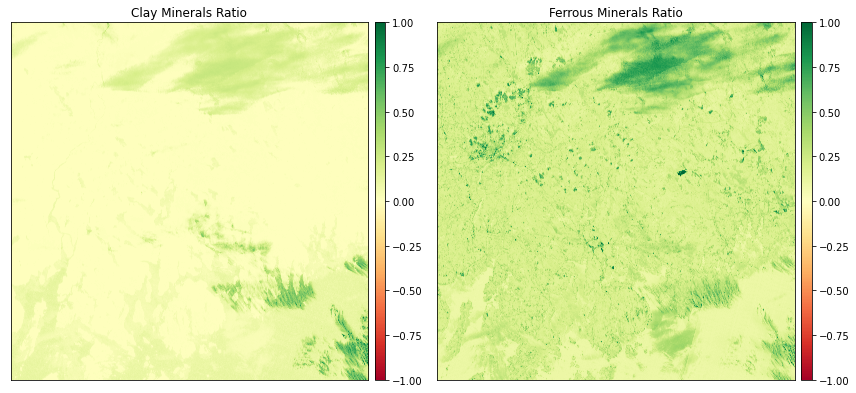

array([<AxesSubplot:title={'center':'Clay Minerals Ratio'}>,
       <AxesSubplot:title={'center':'Ferrous Minerals Ratio'}>],
      dtype=object)

In [17]:
cmr = np.divide(arrSt[9], arrSt[10])
fmr = np.divide(arrSt[11], arrSt[7])
ep.plot_bands(np.stack([cmr, fmr]), cmap="RdYlGn", cols=2, vmin=-1, vmax=1,
              title=("Clay Minerals Ratio", "Ferrous Minerals Ratio"))

## Other: ##

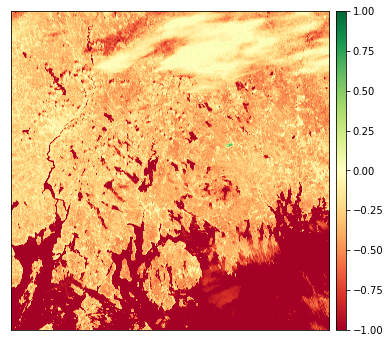

<AxesSubplot:>

In [18]:
L = .5
savi = ((arrSt[11] - arrSt[4]) / (arrSt[11] + arrSt[4] + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(6, 6))

## B. Accessing SentinelSat data directly in Jupyter ##

GeoPandas package: https://geopandas.org/

Folium package: https://python-visualization.github.io/folium/index.html

In [19]:
from sentinelsat import SentinelAPI

import geopandas as gpd
import folium

import rasterio.mask as msk

In [20]:
api = SentinelAPI("*", "*", "https://scihub.copernicus.eu/dhus")

Polygon file courtesy of Abdishakur Hassan

In [21]:
nReserve = gpd.read_file("C:/Users/cyril/Documents/My eBooks/Satellite/NReserve/NaturalReserve_Polygon.shp")
print(nReserve["geometry"][0])

POLYGON ((12.34697305914639 41.70232927273534, 12.37469556439225 41.71808069617049, 12.38540653232815 41.73477720501175, 12.38383138998464 41.74454308754154, 12.38761173160908 41.75367891313393, 12.37595567826706 41.7606095394454, 12.40493829738774 41.78329158919201, 12.41533423685494 41.77982627603627, 12.42320994857251 41.77289564972481, 12.43014057488398 41.77100547891259, 12.43423594497712 41.77100547891259, 12.43612611578934 41.76218468178891, 12.43360588803971 41.75903439710188, 12.43171571722749 41.75651416935226, 12.43581108732063 41.74989857150949, 12.4323457741649 41.74548817294765, 12.43108566029009 41.73572229041786, 12.42793537560306 41.71587549688957, 12.42478509091603 41.71146509832773, 12.45219256769319 41.68090733686354, 12.41722440766716 41.65475997396119, 12.34697305914639 41.70232927273534))


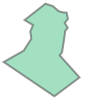

In [22]:
nReserve["geometry"][0]

In [23]:
type(nReserve)

geopandas.geodataframe.GeoDataFrame

In [24]:
m = folium.Map([41.7023292727353, 12.34697305914639])
folium.GeoJson(nReserve).add_to(m)
m

In [28]:
products = api.query(area=nReserve["geometry"][0], date=("20230801", "20230916"), platformname="Sentinel-2",
                     processinglevel="Level-2A", cloudcoverpercentage=(0, 10))

In [29]:
m2 = api.to_geodataframe(products).sort_values(["cloudcoverpercentage"], ascending=[True])
m2

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
bcb7263f-6b23-49f6-bb0e-8d360de31e49,S2B_MSIL2A_20230823T095559_N0509_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-23T09:55:59.024Z, Instrument: MS...",false,2023-08-23 13:14:35,2023-08-23 09:55:59.024,2023-08-23 09:55:59.024,2023-08-23 17:44:14.735,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230823T131435_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230823T131435_A0337...,S2B_MSIL2A_20230823T095559_N0509_R122_T33TTG_2...,bcb7263f-6b23-49f6-bb0e-8d360de31e49,"MULTIPOLYGON (((11.41073 41.40773, 12.72303 41..."
f36b0fa1-0b31-4fd3-8d9a-b47adfb9e7f6,S2B_MSIL2A_20230823T095559_N0509_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-23T09:55:59.024Z, Instrument: MS...",false,2023-08-23 13:14:35,2023-08-23 09:55:59.024,2023-08-23 09:55:59.024,2023-08-23 17:29:12.480,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230823T131435_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230823T131435_A0337...,S2B_MSIL2A_20230823T095559_N0509_R122_T32TQM_2...,f36b0fa1-0b31-4fd3-8d9a-b47adfb9e7f6,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
b9c9e872-b85c-4e87-a5b0-4c58207f630d,S2A_MSIL2A_20230907T100031_N0509_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-09-07T10:00:31.024Z, Instrument: MS...",false,2023-09-07 17:36:54,2023-09-07 10:00:31.024,2023-09-07 10:00:31.024,2023-09-07 19:19:24.632,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230907T173654_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230907T173654_A0428...,S2A_MSIL2A_20230907T100031_N0509_R122_T32TQM_2...,b9c9e872-b85c-4e87-a5b0-4c58207f630d,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
55371941-4856-4a29-806e-89f1f5942a90,S2A_MSIL2A_20230907T100031_N0509_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-09-07T10:00:31.024Z, Instrument: MS...",false,2023-09-07 17:36:54,2023-09-07 10:00:31.024,2023-09-07 10:00:31.024,2023-09-07 19:26:47.474,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230907T173654_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230907T173654_A0428...,S2A_MSIL2A_20230907T100031_N0509_R122_T33TTG_2...,55371941-4856-4a29-806e-89f1f5942a90,"MULTIPOLYGON (((11.41073 41.40773, 12.72303 41..."
556054e6-8937-4d18-93fa-ae0e568eac50,S2B_MSIL2A_20230813T095559_N0509_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-13T09:55:59.024Z, Instrument: MS...",false,2023-08-13 13:05:36,2023-08-13 09:55:59.024,2023-08-13 09:55:59.024,2023-08-13 16:17:07.910,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230813T130536_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230813T130536_A0336...,S2B_MSIL2A_20230813T095559_N0509_R122_T32TQM_2...,556054e6-8937-4d18-93fa-ae0e568eac50,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
dbf22a12-ce99-48a3-809b-223914cfc602,S2B_MSIL2A_20230813T095559_N0509_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-13T09:55:59.024Z, Instrument: MS...",false,2023-08-13 13:05:36,2023-08-13 09:55:59.

In [30]:
api.download(m2.index[0])

Downloading:   0%|          | 0.00/990M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/990M [00:00<?, ?B/s]

{'id': 'bcb7263f-6b23-49f6-bb0e-8d360de31e49',
 'title': 'S2B_MSIL2A_20230823T095559_N0509_R122_T33TTG_20230823T131435',
 'size': 990421931,
 'md5': '5572c9dae8a9834206c985c9095657c2',
 'date': datetime.datetime(2023, 8, 23, 9, 55, 59, 24000),
 'footprint': 'POLYGON((11.354954233772318 42.39470139413761,12.687592758603905 42.42936087235922,12.723033432665233 41.441212166985935,11.410731332148327 41.407726190110715,11.354954233772318 42.39470139413761))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('bcb7263f-6b23-49f6-bb0e-8d360de31e49')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2023, 8, 23, 17, 45, 27, 105000),
 'Ingestion Date': datetime.datetime(2023, 8, 23, 17, 44, 14, 735000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('bcb7263f-6b23-49f6-bb0e-8d360de31e49')/Products('Quicklook')/$value",
 'path': 'S2B_MSIL2A_20230823T095559_N0509_R122_T33TTG_20230823T131435.zip',
 'downloaded_bytes': 990421931}

In [31]:
sPath = ("esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/"
    "L2A_T33TTG_A023600_20210912T100023/IMG_DATA")
bandFiles = sorted(glob.glob(sPath + "/R10m/*.jp2"))
bandFiles

['esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_20210912T100023/IMG_DATA/R10m\\T33TTG_20210912T100029_AOT_10m.jp2',
 'esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_20210912T100023/IMG_DATA/R10m\\T33TTG_20210912T100029_B02_10m.jp2',
 'esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_20210912T100023/IMG_DATA/R10m\\T33TTG_20210912T100029_B03_10m.jp2',
 'esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_20210912T100023/IMG_DATA/R10m\\T33TTG_20210912T100029_B04_10m.jp2',
 'esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_20210912T100023/IMG_DATA/R10m\\T33TTG_20210912T100029_B08_10m.jp2',
 'esg notebooks/S2B_MSIL2A_20210912T100029_N0301_R122_T33TTG_20210912T130049.SAFE/GRANULE/L2A_T33TTG_A023600_202109

In [32]:
b4 = rio.open(bandFiles[3])
b3 = rio.open(bandFiles[2])
b2 = rio.open(bandFiles[1])

with rio.open("rgb0.tiff", "w", driver="Gtiff", width=b4.width, height=b4.height, 
              count=3, crs=b4.crs, transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1), 1) 
    rgb.write(b3.read(1), 2) 
    rgb.write(b4.read(1), 3)

Clip the TIFF image

In [33]:
nReserveProj = nReserve.to_crs(epsg=32633)

In [34]:
with rio.open("rgb0.tiff") as src:
    outImg, outTransform = msk.mask(src, nReserveProj.geometry, crop=True)
    outMeta = src.meta.copy()
    outMeta.update({
        "driver" : "GTiff",
        "height" : outImg.shape[1],
        "width" : outImg.shape[2],
        "transform" : outTransform})

with rio.open("rgbMasked.tiff", "w", **outMeta) as dest:
    dest.write(outImg)

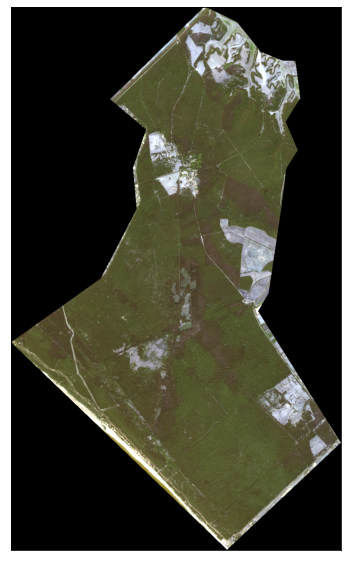

<AxesSubplot:>

In [35]:
ep.plot_rgb(outImg, rgb=(0, 1, 2), stretch=True, str_clip=0.5)